In [1]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
import pandas as pd
import statsmodels.api as sm 
import numpy as np
import random
from sklearn.model_selection import GridSearchCV

<AxesSubplot:title={'center':'count (target)'}>

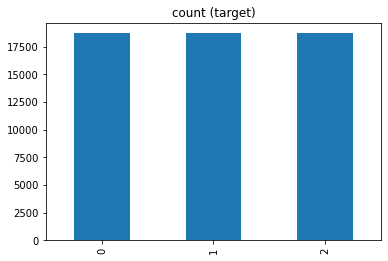

In [2]:
df = pd.read_csv ('Balanced_Visa_Data.csv')
df = df.sample(frac = 1) 
df['CASE_STATUS_CODE'].value_counts().plot(kind='bar', title='count (target)')

In [3]:
df1 = df.loc[(df['CASE_STATUS_CODE']==0) | (df['CASE_STATUS_CODE']==2)] 
df1['CASE_STATUS_CODE'] = np.select([df1.CASE_STATUS_CODE==0],[0],1)
np.unique(df1.CASE_STATUS_CODE)

/Users/patriciaattah/opt/anaconda3/envs/ML7331/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([0, 1])

In [4]:
df1.shape
df1.columns

Index(['Unnamed: 0', 'SOC_GROUP_Code', 'TOTAL_WORKERS', 'NEW_EMPLOYMENT',
       'CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT',
       'NEW_CONCURRENT_EMPLOYMENT', 'ANNUALIZED_PREVAILING_WAGE',
       'PREVAILING_WAGE', 'ANNUALIZED_WAGE_RATE_OF_PAY', 'WAGE_RATE_OF_PAY',
       'DAYS_PROCESS', 'EMPLOYER_NAME_CODE', 'EMPLOYER_CITY_CODE',
       'SOC_NAME_CODE', 'SOC_GROUP_CODE', 'EMPLOYER_STATE_CODE',
       'AGENT_REPRESENTING_EMPLOYER_CODE', 'JOB_TITLE_CODE',
       'WILLFUL_VIOLATOR_CODE', 'WORKSITE_CITY_CODE', 'WORKSITE_STATE_CODE',
       'PW_UNIT_OF_PAY_CODE', 'PW_WAGE_LEVEL_CODE', 'WAGE_UNIT_OF_PAY_CODE',
       'H1B_DEPENDENT_CODE', 'SUPPORT_H1B_CODE', 'LABOR_CON_AGREE_CODE',
       'CASE_STATUS_CODE', 'EMPLOYER_NAME', 'EMPLOYER_CITY', 'SOC_NAME',
       'SOC_GROUP', 'EMPLOYER_STATE', 'AGENT_REPRESENTING_EMPLOYER',
       'JOB_TITLE', 'WILLFUL_VIOLATOR', 'WORKSITE_CITY', 'WORKSITE_STATE',
       'PW_UNIT_OF_PAY', 'PW_WAGE_LEVEL', 'WAGE_UNIT_OF_PAY', 'H1B_DEPENDENT',
      

In [5]:
sett = set(df1.SOC_GROUP_CODE)
#len(sett)

In [6]:
df2 = df1.drop(['CASE_STATUS','EMPLOYER_NAME_CODE', 'EMPLOYER_CITY_CODE',
           'SOC_NAME_CODE', 'EMPLOYER_STATE_CODE','WILLFUL_VIOLATOR_CODE',
           'AGENT_REPRESENTING_EMPLOYER_CODE', 'JOB_TITLE_CODE', 'EMPLOYER_STATE',
           'WORKSITE_CITY_CODE', 'WORKSITE_STATE_CODE', 'WORKSITE_STATE',
           'PW_UNIT_OF_PAY_CODE', 'PW_WAGE_LEVEL_CODE', 'WAGE_UNIT_OF_PAY_CODE',
           'H1B_DEPENDENT_CODE', 'SUPPORT_H1B_CODE', 'LABOR_CON_AGREE_CODE',
           'Unnamed: 0','WORKSITE_CITY','EMPLOYER_NAME',
            'EMPLOYER_CITY','WILLFUL_VIOLATOR_CODE', 'WORKSITE_CITY_CODE',
            'SOC_GROUP_Code','SOC_NAME','JOB_TITLE','SOC_GROUP_CODE'], axis=1)

In [7]:
SOC_GROUP = pd.get_dummies(df2['SOC_GROUP'],drop_first=True)
df2 = pd.concat([df2, SOC_GROUP], axis=1)

In [8]:
AGENT_REPRESENTING_EMPLOYER = pd.get_dummies(df2.AGENT_REPRESENTING_EMPLOYER, prefix='AGENT_REP',drop_first=True)
df2 = pd.concat([df2, AGENT_REPRESENTING_EMPLOYER], axis=1)            

In [9]:
WILLFUL_VIOLATOR = pd.get_dummies(df2.WILLFUL_VIOLATOR, prefix='WILL_VIOL',drop_first=True)
df2 = pd.concat([df2, WILLFUL_VIOLATOR], axis=1)

PW_UNIT_OF_PAY = pd.get_dummies(df2.PW_UNIT_OF_PAY, prefix='PW_UNIT',drop_first=True)
df2 = pd.concat([df2, PW_UNIT_OF_PAY], axis=1)

PW_WAGE_LEVEL = pd.get_dummies(df2.PW_WAGE_LEVEL, prefix='PW_LEVEL',drop_first=True)
df2 = pd.concat([df2, PW_WAGE_LEVEL], axis=1)

WAGE_UNIT_OF_PAY = pd.get_dummies(df2.WAGE_UNIT_OF_PAY, prefix='WAGE_UNIT',drop_first=True)
df2 = pd.concat([df2, WAGE_UNIT_OF_PAY], axis=1)

H1B_DEPENDENT = pd.get_dummies(df2.H1B_DEPENDENT, prefix='H1B_DEP',drop_first=True)
df2 = pd.concat([df2, H1B_DEPENDENT], axis=1)

LABOR_CON_AGREE = pd.get_dummies(df2.LABOR_CON_AGREE, prefix='LABOR_CON_AGREE',drop_first=True)
df2 = pd.concat([df2, LABOR_CON_AGREE], axis=1)

SUPPORT_H1B = pd.get_dummies(df2.SUPPORT_H1B, prefix='SUPPORT_H1B',drop_first=True)
df2 = pd.concat([df2, SUPPORT_H1B], axis=1)

In [10]:
df3 = df2.drop(['WILLFUL_VIOLATOR','PW_UNIT_OF_PAY', 'PW_WAGE_LEVEL',
           'WAGE_UNIT_OF_PAY', 'H1B_DEPENDENT','LABOR_CON_AGREE',
                'AGENT_REPRESENTING_EMPLOYER','SOC_GROUP','SUPPORT_H1B'], axis=1)

In [11]:
pd.set_option('display.max_columns', 100)
df3.head()

,TOTAL_WORKERS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,ANNUALIZED_PREVAILING_WAGE,PREVAILING_WAGE,ANNUALIZED_WAGE_RATE_OF_PAY,WAGE_RATE_OF_PAY,DAYS_PROCESS,CASE_STATUS_CODE,"Arts, Design, Entertainment, Sports, and Media",Building and Grounds Cleaning and Maintenance,Business and Financial Operations,Community and Social Service,Computer and Mathematical,Construction and Extraction,"Education, Training, and Library",Food Preparation and Serving Related,Healthcare Practitioners and Technical,Healthcare Support,"Installation, Maintenance, and Repair",Legal,"Life, Physical, and Social Science",Management,Office and Administrative Support,Personal Care and Service,Production,Sales and Related,Transportation and Material Moving,AGENT_REP_Y,WILL_VIOL_Y,PW_UNIT_Hour,PW_UNIT_Month,PW_UNIT_Week,PW_UNIT_Year,WAGE_UNIT_Hour,WAGE_UNIT_Month,WAGE_UNIT_Week,WAGE_UNIT_Year,H1B_DEP_Y,LABOR_CON_AGREE_Y,SUPPORT_H1B_Y
46452,1,0,0,0,0,70171.488485,70171.488485,74999.074551,74999.074551,4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1
20197,1,1,0,0,0,67246.000000,67246.000000,68000.000000,68000.000000,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1
16264,1,1,0,0,0,94682.000000,94682.000000,120000.000000,120000.000000,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1
18578,2,0,0,0,0,81640.000000,81640.000000,81640.000000,81640.000000,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1
13502,1,0,0,0,0,61318.000000,61318.000000,62000.000000,62000.000000,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1


In [12]:
df3 = pd.concat([df3, SOC_GROUP], axis=1)
df3.shape

(37420, 62)

In [13]:
# divide data set to x and y and Scale data
from sklearn import preprocessing

y = df3['CASE_STATUS_CODE']
x = df3.drop(['CASE_STATUS_CODE'], axis=1)
x = preprocessing.scale(x) 

a = df3['CASE_STATUS_CODE'].values
bb = df3.drop(['CASE_STATUS_CODE'], axis=1)
b = bb.values
b = preprocessing.scale(b) 

x_t = x[:7484]
y_t = y[:7484]

print(x_t.shape)
print(y_t.shape)

(7484, 61)
(7484,)


In [14]:
# create train set

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
print(y_train.shape)
print(x_test.shape)

(29936,)
(7484, 61)


## Logistic Regression

In [15]:
# grid search
params = {
    'penalty':['l1','l2'],        # l1 is Lasso, l2 is Ridge
    'solver':['liblinear'],
    'C': [1,10,100]
}

lr = LogisticRegression()
lr_gs = GridSearchCV(lr, params, cv=5, verbose=1).fit(x_train, y_train)

print ("Best Params", lr_gs.best_params_)
print ("Best Score", lr_gs.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Params {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score 0.8438671117637536


In [16]:
# logistic regression

lg = LogisticRegression(penalty='l1',solver='liblinear', random_state=0,C=10.0)
lg.fit(x_train,y_train)

LogisticRegression(C=10.0, penalty='l1', random_state=0, solver='liblinear')

In [17]:
# cross validation

from sklearn.model_selection import ShuffleSplit
num_cv_iterations = 3
cv_object = ShuffleSplit(n_splits=num_cv_iterations,test_size  = 0.2)

In [18]:
# accuracies fom cross validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(lg, x_t, y=y_t, cv=cv_object)
print(accuracies)

[0.84168337 0.84569138 0.84836339]


In [19]:
# predictions for logistic regression

y_pred = lg.predict(x_test)

In [20]:
# pull logistic regrssion results
pd.set_option('display.max_rows', None)

accuracy_score(y_test, y_pred)
coef = lg.coef_
coefs = []
features = bb.columns

for i in coef[0]:
    coefs.append(round(i,6))
    
coef_abs = [abs(i) for i in coefs] 
    
weight = list(zip(features,coefs,coef_abs))
df_weights = pd.DataFrame(weight, columns = ['feature_names', 'coef','coef_abs']) 
df_weight = df_weights.sort_values(by=['coef_abs'], )
df_weight = df_weight.drop_duplicates()

In [21]:
df_weight

,feature_names,coef,coef_abs
46,Computer and Mathematical,0.000022,0.000022
48,"Education, Training, and Library",0.000024,0.000024
59,Sales and Related,-0.000126,0.000126
28,Transportation and Material Moving,-0.007363,0.007363
55,Management,-0.014495,0.014495
27,Sales and Related,-0.020209,0.020209
60,Transportation and Material Moving,-0.020383,0.020383
50,Healthcare Practitioners and Technical,0.037362,0.037362
18,Healthcare Practitioners and Technical,0.037678,0.037678
25,Personal Care and Service,0.039879,0.039879


In [22]:
df_weight.shape

(61, 3)

In [23]:
df_weights = df_weight

df_weights = df_weights[df_weights['coef_abs'] > 0.4]
df_weights

,feature_names,coef,coef_abs
36,WAGE_UNIT_Month,0.422092,0.422092
17,Food Preparation and Serving Related,0.463075,0.463075
35,WAGE_UNIT_Hour,-0.477016,0.477016
1,NEW_EMPLOYMENT,-0.491217,0.491217
33,PW_UNIT_Week,0.497524,0.497524
19,Healthcare Support,0.512024,0.512024
43,Building and Grounds Cleaning and Maintenance,0.518972,0.518972
15,Construction and Extraction,0.547107,0.547107
21,Legal,0.551739,0.551739
45,Community and Social Service,0.555421,0.555421


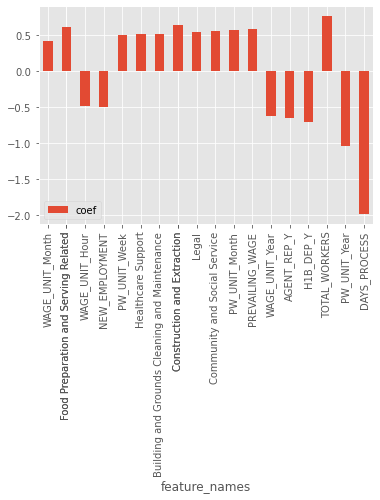

In [24]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


ax = df_weights.plot.bar(y='coef', x = 'feature_names')
plt.show()

In [25]:
# logistic regression coefficients

print(coef)

[[ 7.62748823e-01 -4.91217456e-01 -3.58227343e-01 -2.67543044e-01
   1.28074897e-01 -2.04115820e-01  5.86115625e-01 -1.00542848e-01
   1.42320523e-01 -1.98607945e+00  6.63022191e-02  3.49257655e-01
   4.47786108e-02  3.45261766e-01  1.33146912e-01  5.47107373e-01
   1.97646257e-01  4.63075354e-01  3.76775374e-02  5.12024346e-01
   1.91343550e-01  5.51739088e-01  5.97319759e-02 -4.55484702e-02
   1.07651240e-01  3.98788445e-02  1.32187963e-01 -2.02090110e-02
  -7.36260325e-03 -6.50851219e-01 -7.33984210e-02 -3.46924092e-01
   5.69320975e-01  4.97524023e-01 -1.03546260e+00 -4.77016295e-01
   4.22092280e-01  3.23348435e-01 -6.16078904e-01 -7.09980208e-01
   1.60573459e-01 -3.55196974e-01  1.49417554e-01  5.18972365e-01
   8.48827589e-02  5.55420623e-01  2.22648758e-05  6.41834872e-01
   2.40379874e-05  6.13470399e-01  3.73616758e-02  2.36703621e-01
   1.19862177e-01  1.94458410e-01  9.66607061e-02 -1.44952874e-02
   1.30074831e-01  1.85806645e-01  1.04949832e-01 -1.25857025e-04
  -2.03832

In [26]:
df3.shape

(37420, 62)

In [27]:
from sklearn import metrics as mt

In [28]:
iter_num=0
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(b,a)):
    lg.fit(b[train_indices],a[train_indices])  # train object
    y_hat = lg.predict(b[test_indices])
    
    print("====Iteration",iter_num," ====")
    print("accuracy", mt.accuracy_score(a[test_indices],y_hat)) 
    print("confusion matrix\n",mt.confusion_matrix(a[test_indices],y_hat))
    print(classification_report(a[test_indices],y_hat))

====Iteration 0  ====
accuracy 0.8413949759486905
confusion matrix
 [[3272  532]
 [ 655 3025]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      3804
           1       0.85      0.82      0.84      3680

    accuracy                           0.84      7484
   macro avg       0.84      0.84      0.84      7484
weighted avg       0.84      0.84      0.84      7484

====Iteration 1  ====
accuracy 0.8452699091394976
confusion matrix
 [[3297  476]
 [ 682 3029]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      3773
           1       0.86      0.82      0.84      3711

    accuracy                           0.85      7484
   macro avg       0.85      0.85      0.85      7484
weighted avg       0.85      0.85      0.85      7484

====Iteration 2  ====
accuracy 0.8462052378407269
confusion matrix
 [[3264  519]
 [ 632 3069]]
              precision    recall  f1-score   support

      

## Support Vector Machines

In [30]:
# reducing data set size for SVC

df4=df3.sort_values(by=['CASE_STATUS_CODE'])
df4=df4.iloc[13000:, :]
df4=df4.iloc[:11420, :]
df4.shape

(11420, 62)

In [31]:
df4 = df4.sample(frac = 1) 
df4.head(5)

,TOTAL_WORKERS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,ANNUALIZED_PREVAILING_WAGE,PREVAILING_WAGE,ANNUALIZED_WAGE_RATE_OF_PAY,WAGE_RATE_OF_PAY,DAYS_PROCESS,CASE_STATUS_CODE,"Arts, Design, Entertainment, Sports, and Media",Building and Grounds Cleaning and Maintenance,Business and Financial Operations,Community and Social Service,Computer and Mathematical,Construction and Extraction,"Education, Training, and Library",Food Preparation and Serving Related,Healthcare Practitioners and Technical,Healthcare Support,"Installation, Maintenance, and Repair",Legal,"Life, Physical, and Social Science",Management,Office and Administrative Support,Personal Care and Service,Production,Sales and Related,Transportation and Material Moving,AGENT_REP_Y,WILL_VIOL_Y,PW_UNIT_Hour,PW_UNIT_Month,PW_UNIT_Week,PW_UNIT_Year,WAGE_UNIT_Hour,WAGE_UNIT_Month,WAGE_UNIT_Week,WAGE_UNIT_Year,H1B_DEP_Y,LABOR_CON_AGREE_Y,SUPPORT_H1B_Y,"Arts, Design, Entertainment, Sports, and Media",Building and Grounds Cleaning and Maintenance,Business and Financial Operations,Community and Social Service,Computer and Mathematical,Construction and Extraction,"Education, Training, and Library",Food Preparation and Serving Related,Healthcare Practitioners and Technical,Healthcare Support,"Installation, Maintenance, and Repair",Legal,"Life, Physical, and Social Science",Management,Office and Administrative Support,Personal Care and Service,Production,Sales and Related,Transportation and Material Moving
5820,1,1,0,0,0,79331.000000,79331.000000,79331.000000,79331.000000,6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
47876,1,0,0,0,0,55093.485219,55093.485219,55216.371642,55216.371642,6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7350,1,0,0,0,0,68557.000000,68557.000000,69000.000000,69000.000000,6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7976,3,0,0,1,0,69763.000000,69763.000000,69763.000000,69763.000000,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
54363,4,1,0,0,0,54424.583504,54424.583504,60000.000000,60000.000000,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:title={'center':'count (target)'}>

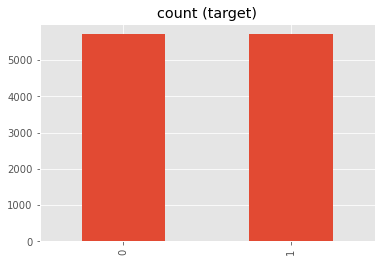

In [32]:
df4['CASE_STATUS_CODE'].value_counts().plot(kind='bar', title='count (target)')

In [33]:
from sklearn import svm

In [34]:
# Reduced data set preprocessing for SVC
# divide data set to x and y and Scale data
from sklearn import preprocessing

y = df4['CASE_STATUS_CODE']
x = df4.drop(['CASE_STATUS_CODE'], axis=1)
x = preprocessing.scale(x) 

a = df4['CASE_STATUS_CODE'].values
bb = df4.drop(['CASE_STATUS_CODE'], axis=1)
b = bb.values
b = preprocessing.scale(b) 

x_t = x[:2284]
y_t = y[:2284]

print(x_t.shape)
print(y_t.shape)

(2284, 61)
(2284,)


In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
print(y_train.shape)
print(x_test.shape)

(9136,)
(2284, 61)


In [46]:
# Grid search
sv = GridSearchCV(svm.SVC(gamma='auto',random_state=89),{
            'C':[1,10,100],
                'kernel':['rbf']}, cv=5, verbose=1,)

sv_gs = sv.fit(x_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [47]:
print ("Best Params", sv_gs.best_params_)
print ("Best Score", sv_gs.best_score_)

Best Params {'C': 100, 'kernel': 'rbf'}
Best Score 0.8821149209702744


In [48]:
sv = svm.SVC(C=100,kernel= 'rbf',random_state=89)
sv.fit(x_train, y_train)
y_predsv = sv.predict(x_test)

In [49]:
iter_num=0
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(b,a)):
    sv.fit(b[train_indices],a[train_indices])  # train object
    y_hat = sv.predict(b[test_indices])
    
    print("====Iteration",iter_num," ====")
    print("accuracy", mt.accuracy_score(a[test_indices],y_hat)) 
    print("confusion matrix\n",mt.confusion_matrix(a[test_indices],y_hat))
    print(classification_report(a[test_indices],y_hat))

====Iteration 0  ====
accuracy 0.887478108581436
confusion matrix
 [[1091   71]
 [ 186  936]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1162
           1       0.93      0.83      0.88      1122

    accuracy                           0.89      2284
   macro avg       0.89      0.89      0.89      2284
weighted avg       0.89      0.89      0.89      2284

====Iteration 1  ====
accuracy 0.897985989492119
confusion matrix
 [[1100   62]
 [ 171  951]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.90      1162
           1       0.94      0.85      0.89      1122

    accuracy                           0.90      2284
   macro avg       0.90      0.90      0.90      2284
weighted avg       0.90      0.90      0.90      2284

====Iteration 2  ====
accuracy 0.8774080560420315
confusion matrix
 [[1038   82]
 [ 198  966]]
              precision    recall  f1-score   support

        

In [56]:
# to call the suppport vector foe each variable use the [column index]

svc = sv.support_vectors_
svc.shape

(2535, 61)

In [59]:
len(svc[0])

61

In [66]:
svc[2534]

array([-0.21616708, -0.45551872, -0.34711654, -0.17580012, -0.06689259,
        0.19565073,  0.26735194,  0.40442242,  0.50206394,  0.18928452,
       -0.10085876, -0.08504303, -0.17989732, -0.13917547,  0.45082722,
       -0.09110153, -0.09351369, -0.10434484, -0.10130081, -0.07328159,
       -0.07682138, -0.07565944, -0.07019859, -0.11768361, -0.02960446,
       -0.02960446, -0.03745686, -0.02960446,  0.        , -0.57532802,
       -0.03375872, -0.32582266, -0.07739596, -0.08399211,  0.35310045,
       -0.31937046, -0.06075635, -0.04683956,  0.33398159,  0.42569518,
        0.2379595 ,  0.39909043, -0.10085876, -0.08504303, -0.17989732,
       -0.13917547,  0.45082722, -0.09110153, -0.09351369, -0.10434484,
       -0.10130081, -0.07328159, -0.07682138, -0.07565944, -0.07019859,
       -0.11768361, -0.02960446, -0.02960446, -0.03745686, -0.02960446,
        0.        ])